## APL Assignment 4

Name: Deepak Charan S

Roll No: EE23B022

Date: 28.09.24

Description: To analyze keyboard usage patterns for a given keyboard layout and text input by generating a heatmap visualization of key usage. To also calculate the total distance traveled by fingers while typing



In [1]:
from collections import defaultdict  # Importing Libraries
import math
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle

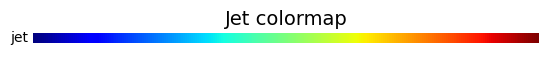

In [2]:
import pylab

cm = pylab.get_cmap("jet")  # The colormap I have used for this assignment

cmaps = {}
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradient(category, cmap_list):
    figh = 0.35 + 0.15 + 0.22
    fig, axs = plt.subplots(nrows=2, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh, left=0.2, right=0.99)
    axs[0].set_title(f"{category} colormap", fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect="auto", cmap=mpl.colormaps[name])
        ax.text(
            -0.01,
            0.5,
            name,
            va="center",
            ha="right",
            fontsize=10,
            transform=ax.transAxes,
        )

    for ax in axs:
        ax.set_axis_off()


plot_color_gradient(
    "Jet",
    [
        "jet",
    ],
)

In [3]:
QWERTY_LAYOUT = {  # Qwerty layout taken from the moodle handout
    "row1": {
        "keys": "`1234567890-=",
        "positions": [
            (0, 0),
            (1, 0),
            (2, 0),
            (3, 0),
            (4, 0),
            (5, 0),
            (6, 0),
            (7, 0),
            (8, 0),
            (9, 0),
            (10, 0),
            (11, 0),
            (12, 0),
        ],
    },
    "row2": {
        "keys": "qwertyuiop[]\\",
        "positions": [
            (0.5, 1),
            (1.5, 1),
            (2.5, 1),
            (3.5, 1),
            (4.5, 1),
            (5.5, 1),
            (6.5, 1),
            (7.5, 1),
            (8.5, 1),
            (9.5, 1),
            (10.5, 1),
            (11.5, 1),
            (12.5, 1),
        ],
    },
    "row3": {
        "keys": "asdfghjkl;'",
        "positions": [
            (0.75, 2),
            (1.75, 2),
            (2.75, 2),
            (3.75, 2),
            (4.75, 2),
            (5.75, 2),
            (6.75, 2),
            (7.75, 2),
            (8.75, 2),
            (9.75, 2),
            (10.75, 2),
        ],
    },
    "row4": {
        "keys": "zxcvbnm,./",
        "positions": [
            (1.25, 3),
            (2.25, 3),
            (3.25, 3),
            (4.25, 3),
            (5.25, 3),
            (6.25, 3),
            (7.25, 3),
            (8.25, 3),
            (9.25, 3),
            (10.25, 3),
        ],
    },
    "special_keys": {
        "Shift_L": (0, 3),
        "Shift_R": (11.25, 3),
        "Space": (3.5, 4),
        "Backspace": (13, 0),
        "Tab": (0, 1),
        "CapsLock": (0, 2),
        "Enter": (12, 2),
    },
}
# Function to get key position

In [6]:
class kbd_analysis:  # Used a class for all the operations
    def __init__(self, layout=QWERTY_LAYOUT):
        self.layout = layout  # Uses the layout provided by user

        self.travel = (
            self.key_dist()
        )  # Dictionary which stores the distance travelled by fingers to type each key
        self.freq = defaultdict(
            int
        )  # Dictionary which stores the stores the frequencies of each key pressed
        self.let_rank = ([])  # List which ranks the usage of each letter and is used while assinging colour
        self.fig = None  # for plotting
        self.ax = None

    def visualise_kyb(self):  # Method to visualise the keyboard
        self.fig, self.ax = plt.subplots(figsize=(13, 4))

        self.ax.set_xticks([])  # Removing axis points (1,2,3.. on x axis wont show up)
        self.ax.set_yticks([])

        self.ax.set_xlim(-1, 15)
        self.ax.set_ylim(-1, 5)

        plt.tight_layout()
        plt.gca().invert_yaxis()

        for rows in layout:
            if (
                rows == "special_keys"
            ):  # all the special characters on the side of the keyboard
                for key in layout[rows]:
                    key_loc = self.get_key_position(key)

                    if self.freq[key] == 0:  # Key was never pressed
                        color = cm(1.0 * 0)
                    else:  # Adjust its colour according to its usage
                        color = cm(1.0 * ((self.freq[key] / self.let_rank[-1])))

                    # Since the coordinates provided were quite bad and resulted in a cluttered keyboard, I decided to offset the coordinates (pushed the special keys a bit to the left/right)
                    if key == "Shift_L":
                        rect = Rectangle(
                            (key_loc[0], key_loc[1]),
                            1,
                            0.75,
                            facecolor=color,
                            alpha=0.9,
                            edgecolor="black",
                        )
                        self.ax.text(
                            key_loc[0] + 0.5,
                            key_loc[1] + 0.375,
                            key,
                            horizontalalignment="center",
                            verticalalignment="center",
                        )
                        self.ax.add_patch(rect)

                    elif key == "CapsLock":
                        rect = Rectangle(
                            (key_loc[0], key_loc[1]),
                            0.6,
                            0.75,
                            facecolor=color,
                            alpha=0.9,
                            edgecolor="black",
                        )
                        self.ax.text(
                            key_loc[0] + 0.25,
                            key_loc[1] + 0.375,
                            "Caps",
                            horizontalalignment="center",
                            verticalalignment="center",
                        )
                        self.ax.add_patch(rect)

                    elif key == "Tab":
                        rect = Rectangle(
                            (key_loc[0], key_loc[1]),
                            0.35,
                            0.75,
                            facecolor=color,
                            alpha=0.9,
                            edgecolor="black",
                        )
                        self.ax.text(
                            key_loc[0] + 0.2,
                            key_loc[1] + 0.375,
                            key,
                            horizontalalignment="center",
                            verticalalignment="center",
                        )
                        self.ax.add_patch(rect)

                    elif key == "Shift_R":
                        rect = Rectangle(
                            (key_loc[0], key_loc[1]),
                            1,
                            0.75,
                            facecolor=color,
                            alpha=0.9,
                            edgecolor="black",
                        )
                        self.ax.text(
                            key_loc[0] + 0.5,
                            key_loc[1] + 0.375,
                            key,
                            horizontalalignment="center",
                            verticalalignment="center",
                        )
                        self.ax.add_patch(rect)

                    elif key == "Enter":
                        rect = Rectangle(
                            (key_loc[0] - 0.3, key_loc[1]),
                            1,
                            0.75,
                            facecolor=color,
                            alpha=0.9,
                            edgecolor="black",
                        )
                        self.ax.text(
                            key_loc[0] + 0.25,
                            key_loc[1] + 0.375,
                            key,
                            horizontalalignment="center",
                            verticalalignment="center",
                        )
                        self.ax.add_patch(rect)

                    elif key == "Backspace":
                        rect = Rectangle(
                            (key_loc[0], key_loc[1]),
                            1,
                            0.75,
                            facecolor=color,
                            alpha=0.9,
                            edgecolor="black",
                        )
                        self.ax.text(
                            key_loc[0] + 0.5,
                            key_loc[1] + 0.375,
                            "Bckspc",
                            horizontalalignment="center",
                            verticalalignment="center",
                        )
                        self.ax.add_patch(rect)

                    elif key == "Space":  # Skews distribution so left it as gray
                        rect = Rectangle(
                            (3.5, key_loc[1]),
                            6,
                            0.75,
                            facecolor=(0.3, 0.3, 0.3),
                            alpha=0.9,
                            edgecolor="black",
                        )
                        self.ax.text(
                            6.25,
                            key_loc[1] + 0.375,
                            "Space",
                            horizontalalignment="center",
                            verticalalignment="center",
                        )
                        self.ax.add_patch(rect)

            else:
                for key in layout[rows]["keys"]:
                    if self.freq[key] == 0:  # Key was never pressed
                        color = cm(1.0 * 0)
                    else:  # Give it colour accoring to its usage
                        color = cm(1.0 * ((self.freq[key] / self.let_rank[-1])))

                    key_loc = self.get_key_position(
                        key
                    )  # Getting the key coordinates and drawing a rectangle around it
                    rect = Rectangle(
                        key_loc,
                        0.75,
                        0.75,
                        facecolor=color,
                        alpha=0.9,
                        edgecolor="black",
                    )
                    self.ax.text(
                        key_loc[0] + 0.375,
                        key_loc[1] + 0.375,
                        key,
                        horizontalalignment="center",
                        verticalalignment="center",
                    )
                    self.ax.add_patch(rect)
        plt.show()

    def euc_dist(
        self, key1, key2
    ):  # Method to get the distance between two keys (needed for computing travel distance)
        return math.sqrt((key2[1] - key1[1]) ** 2 + (key2[0] - key1[0]) ** 2)

    def get_key_position(
        self, key
    ):  # Method to get the key position from the input layout
        for row in self.layout.values():
            if "keys" in row and key in row["keys"]:
                index = row["keys"].index(key)
                return row["positions"][index]
        return self.layout["special_keys"].get(key)

    def key_dist(self):  # To map each key to a distance
        di = {}

        for i in range(4):
            di[self.layout["row3"]["keys"][i]] = 0  # Left hand rest on these keys
            # keys on rows other than home rows are pressed accroding to touch typing convention
            di[self.layout["row1"]["keys"][i]] = self.euc_dist(
                self.get_key_position(self.layout["row1"]["keys"][i]),
                self.get_key_position(self.layout["row3"]["keys"][i]),
            )
            di[self.layout["row2"]["keys"][i]] = self.euc_dist(
                self.get_key_position(self.layout["row2"]["keys"][i]),
                self.get_key_position(self.layout["row3"]["keys"][i]),
            )
            di[self.layout["row4"]["keys"][i]] = self.euc_dist(
                self.get_key_position(self.layout["row4"]["keys"][i]),
                self.get_key_position(self.layout["row3"]["keys"][i]),
            )

        di[self.layout["row3"]["keys"][4]] = 1
        di[self.layout["row1"]["keys"][4]] = self.euc_dist(
            self.get_key_position(self.layout["row1"]["keys"][4]),
            self.get_key_position(self.layout["row3"]["keys"][3]),
        )
        di[self.layout["row2"]["keys"][4]] = self.euc_dist(
            self.get_key_position(self.layout["row2"]["keys"][4]),
            self.get_key_position(self.layout["row3"]["keys"][3]),
        )
        di[self.layout["row4"]["keys"][4]] = self.euc_dist(
            self.get_key_position(self.layout["row4"]["keys"][4]),
            self.get_key_position(self.layout["row3"]["keys"][3]),
        )
        di[self.layout["row1"]["keys"][5]] = di[self.layout["row1"]["keys"][4]]
        di[self.layout["row2"]["keys"][5]] = di[self.layout["row2"]["keys"][4]]
        di[self.layout["row4"]["keys"][5]] = di[self.layout["row4"]["keys"][4]]
        di[self.layout["row3"]["keys"][5]] = 1

        for i in range(6, 10):
            di[self.layout["row3"]["keys"][i]] = 0
            di[self.layout["row1"]["keys"][i]] = self.euc_dist(
                self.get_key_position(self.layout["row1"]["keys"][i]),
                self.get_key_position(self.layout["row3"]["keys"][i]),
            )
            di[self.layout["row2"]["keys"][i]] = self.euc_dist(
                self.get_key_position(self.layout["row2"]["keys"][i]),
                self.get_key_position(self.layout["row3"]["keys"][i]),
            )
            di[self.layout["row4"]["keys"][i]] = self.euc_dist(
                self.get_key_position(self.layout["row4"]["keys"][i]),
                self.get_key_position(self.layout["row3"]["keys"][i]),
            )

        # All the remaining keys on the right side of the keyboard are pressed by right little finger
        for j in range(10, len(self.layout["row1"]["keys"])):
            di[self.layout["row1"]["keys"][j]] = self.euc_dist(
                self.get_key_position(self.layout["row1"]["keys"][j]),
                self.get_key_position(self.layout["row3"]["keys"][9]),
            )

        for j in range(10, len(self.layout["row2"]["keys"])):
            di[self.layout["row2"]["keys"][j]] = self.euc_dist(
                self.get_key_position(self.layout["row2"]["keys"][j]),
                self.get_key_position(self.layout["row3"]["keys"][9]),
            )

        for j in range(10, len(self.layout["row3"]["keys"])):
            di[self.layout["row3"]["keys"][j]] = self.euc_dist(
                self.get_key_position(self.layout["row3"]["keys"][j]),
                self.get_key_position(self.layout["row3"]["keys"][9]),
            )

        for j in range(10, len(self.layout["row4"]["keys"])):
            di[self.layout["row4"]["keys"][j]] = self.euc_dist(
                self.get_key_position(self.layout["row4"]["keys"][j]),
                self.get_key_position(self.layout["row3"]["keys"][9]),
            )

        for j in self.layout["special_keys"]:
            if j == "Space":
                di["Space"] = (
                    0  # I have assumed thumbs rest on space so distance travelled=0
                )
                continue

            # To check which finger I need to press to type the special character
            di[j] = min(
                self.euc_dist(
                    self.get_key_position(j),
                    self.get_key_position(self.layout["row3"]["keys"][9]),
                ),
                self.euc_dist(
                    self.get_key_position(j),
                    self.get_key_position(self.layout["row3"]["keys"][0]),
                ),
            )

        return di

    def travel_dist(self, seq):
        trav = 0  # Stores distance travelled
        self.freq = defaultdict(int)

        for s in seq:
            if s == " ":
                # trav+=2*self.travel['Space']   #Needn't bother since travel distance of space is 0
                # self.freq["Space"] += 1
                continue

            elif s == "\n":  # Enter was pressed
                trav += self.travel["Enter"]
                self.freq["Enter"] += 1
                continue

            elif not s.isalnum():  # A symbol was pressed
                # characters which appear only while pressing shift (like !,#,@,(,_) dont come in the layout so I had to brute force to check for their prescence
                if s == "!":
                    trav += self.travel["Shift_R"] + self.travel["1"]
                    self.freq["Shift_R"] += 1
                    self.freq["1"] += 1

                elif s == "@":
                    trav += self.travel["Shift_R"] + self.travel["1"]
                    self.freq["Shift_R"] += 1
                    self.freq["2"] += 1

                elif s == "#":
                    trav += self.travel["Shift_R"] + self.travel["1"]
                    self.freq["Shift_R"] += 1
                    self.freq["3"] += 1

                elif s == "$":
                    trav += self.travel["Shift_R"] + self.travel["1"]
                    self.freq["Shift_R"] += 1
                    self.freq["4"] += 1

                elif s == "%":
                    trav += self.travel["Shift_R"] + self.travel["1"]
                    self.freq["Shift_R"] += 1
                    self.freq["5"] += 1

                elif s == "^":
                    trav += self.travel["Shift_L"] + self.travel["1"]
                    self.freq["Shift_L"] += 1
                    self.freq["6"] += 1

                elif s == "&":
                    trav += self.travel["Shift_L"] + self.travel["1"]
                    self.freq["Shift_L"] += 1
                    self.freq["7"] += 1

                elif s == "*":
                    trav += self.travel["Shift_L"] + self.travel["1"]
                    self.freq["Shift_L"] += 1
                    self.freq["8"] += 1

                elif s == "(":
                    trav += self.travel["Shift_L"] + self.travel["1"]
                    self.freq["Shift_L"] += 1
                    self.freq["9"] += 1

                elif s == ")":
                    trav += self.travel["Shift_L"] + self.travel["1"]
                    self.freq["Shift_L"] += 1
                    self.freq["0"] += 1

                elif s == "_":
                    trav += self.travel["Shift_L"] + self.travel["1"]
                    self.freq["Shift_L"] += 1
                    self.freq["-"] += 1

                elif s == "+":
                    trav += self.travel["Shift_L"] + self.travel["1"]
                    self.freq["Shift_L"] += 1
                    self.freq["="] += 1

                elif s == "|":
                    trav += self.travel["Shift_L"] + self.travel["1"]
                    self.freq["Shift_L"] += 1
                    self.freq["\\"] += 1

                elif s == "}":
                    trav += self.travel["Shift_L"] + self.travel["1"]
                    self.freq["Shift_L"] += 1
                    self.freq["]"] += 1

                elif s == "{":
                    trav += self.travel["Shift_L"] + self.travel["1"]
                    self.freq["Shift_L"] += 1
                    self.freq["["] += 1

                elif s == ":":
                    trav += self.travel["Shift_L"] + self.travel["1"]
                    self.freq["Shift_L"] += 1
                    self.freq[";"] += 1

                elif s == '"':
                    trav += self.travel["Shift_L"] + self.travel["1"]
                    self.freq["Shift_L"] += 1
                    self.freq["'"] += 1

                elif s == "?":
                    trav += self.travel["Shift_L"] + self.travel["1"]
                    self.freq["Shift_L"] += 1
                    self.freq["/"] += 1

                elif s == ">":
                    trav += self.travel["Shift_L"] + self.travel["1"]
                    self.freq["Shift_L"] += 1
                    self.freq["."] += 1

                elif s == "<":
                    trav += self.travel["Shift_L"] + self.travel["1"]
                    self.freq["Shift_L"] += 1
                    self.freq[","] += 1

                elif s == "~":
                    trav += self.travel["Shift_R"] + self.travel["1"]
                    self.freq["Shift_R"] += 1
                    self.freq["`"] += 1

                else:  # We didnt need to press shift (key present in layout)
                    trav += self.travel[s]
                    self.freq[s] += 1

                continue

            elif (
                s.isupper()
            ):  # Capital letter was pressed (but we need to check which shift we needed to press
                if self.euc_dist(
                    self.get_key_position(s.lower()),
                    self.get_key_position(self.layout["row3"]["keys"][3]),
                ) < self.euc_dist(
                    self.get_key_position(s.lower()),
                    self.get_key_position(self.layout["row3"]["keys"][9]),
                ):
                    trav += self.travel["Shift_R"]
                    self.freq["Shift_R"] += 1
                else:
                    trav += self.travel["Shift_L"]
                    self.freq["Shift_L"] += 1

            trav += self.travel[s.lower()]
            self.freq[s.lower()] += 1

        self.let_rank = list(
            set(self.freq.values())
        )  # ranking each character's frequency
        self.let_rank.sort()
        print(f"The travel distance is {trav}")
        self.visualise_kyb()  # showing the keyboard heatmap

Now that we have written our class, lets try it out against some cases

The travel distance is 202.60871165768998


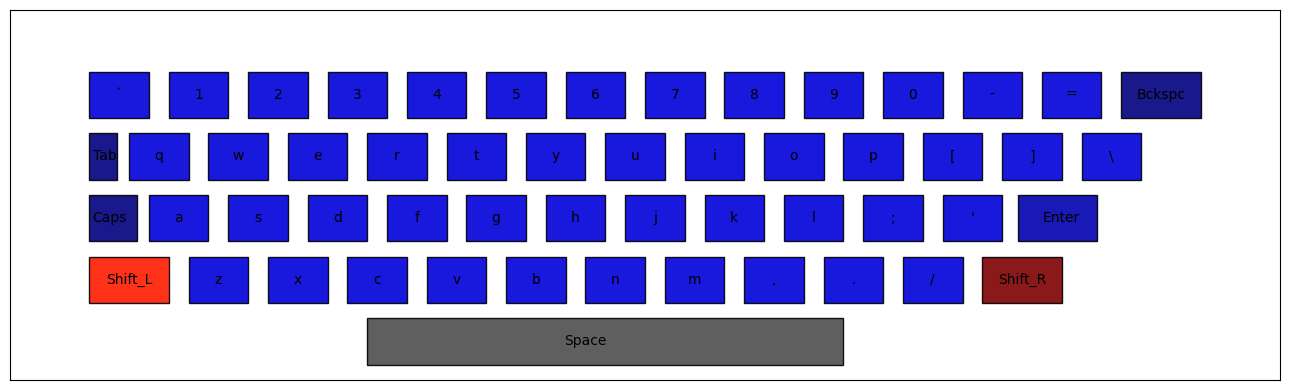

In [12]:
if __name__ == "__main__":
    layout = QWERTY_LAYOUT

    sample_string_1 = """`1234567890-=qwertyuiop[]\\asdfghjkl;\'zxcvbnm,. /~!@#$%^&*()
    _+QWERTYUIOP{}|ASD FGHJKL:\"ZXCVBNM<>?"""

    qwerty = kbd_analysis(layout)
    qwerty.travel_dist(sample_string_1)

The travel distance is 50.89142847466873


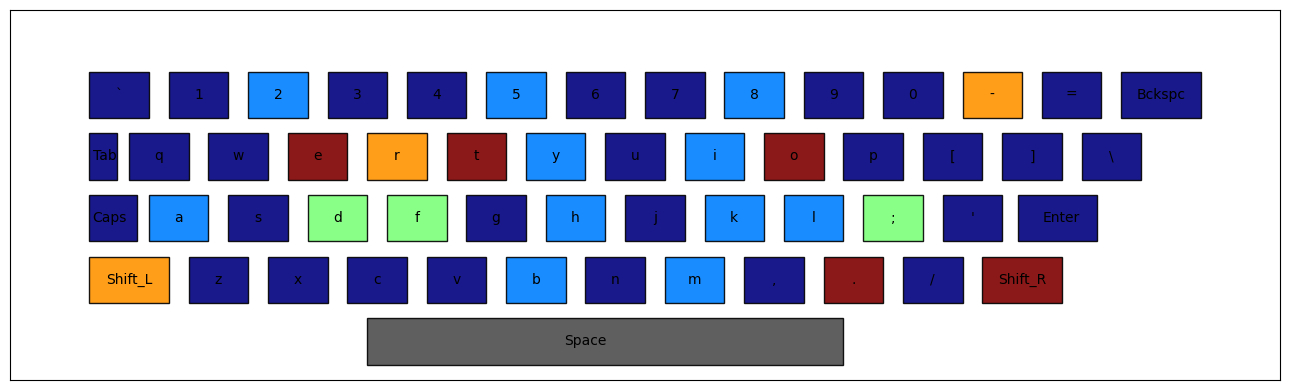

In [13]:
sample_string_2 = "The_Old foRmat-of keybo@rd i5 8etTer.... ;_;"
qwerty.travel_dist(sample_string_2)

The travel distance is 2.0307764064044154


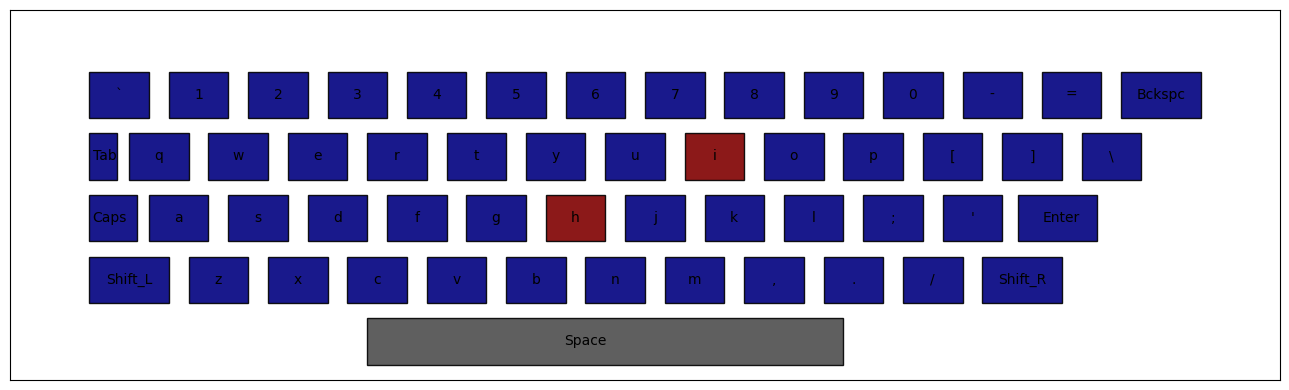

In [9]:
s = input("Enter String: ")  # User can give an input
qwerty.travel_dist(s)

In [10]:
sample_long_string = """1In the beginning God created the heaven and the earth.

2And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters.

3And God said, Let there be light and there was light.

4And God saw the light, that it was good  and God divided the light from the darkness.

5And God called the light Day, and the darkness he called Night. And the evening and the morning were the first day.

6And God said, Let there be a firmament in the midst of the waters, and let it divide the waters from the waters.

7And God made the firmament, and divided the waters which were under the firmament from the waters which were above the firmament  and it was so.

8And God called the firmament Heaven. And the evening and the morning were the second day.

9And God said, Let the waters under the heaven be gathered together unto one place, and let the dry land appear  and it was so.

10And God called the dry land Earth; and the gathering together of the waters called he Seas  and God saw that it was good.

11And God said, Let the earth bring forth grass, the herb yielding seed, and the fruit tree yielding fruit after his kind, whose seed is in itself, upon the earth  and it was so.

12And the earth brought forth grass, and herb yielding seed after his kind, and the tree yielding fruit, whose seed was in itself, after his kind  and God saw that it was good.

13And the evening and the morning were the third day.

14And God said, Let there be lights in the firmament of the heaven to divide the day from the night; and let them be for signs, and for seasons, and for days, and years 

15And let them be for lights in the firmament of the heaven to give light upon the earth  and it was so.

16And God made two great lights; the greater light to rule the day, and the lesser light to rule the night  he made the stars also.

17And God set them in the firmament of the heaven to give light upon the earth,

18And to rule over the day and over the night, and to divide the light from the darkness  and God saw that it was good.

19And the evening and the morning were the fourth day.

20And God said, Let the waters bring forth abundantly the moving creature that hath life, and fowl that may fly above the earth in the open firmament of heaven.

21And God created great whales, and every living creature that moveth, which the waters brought forth abundantly, after their kind, and every winged fowl after his kind  and God saw that it was good.

22And God blessed them, saying, Be fruitful, and multiply, and fill the waters in the seas, and let fowl multiply in the earth.

23And the evening and the morning were the fifth day.

24And God said, Let the earth bring forth the living creature after his kind, cattle, and creeping thing, and beast of the earth after his kind  and it was so.

25And God made the beast of the earth after his kind, and cattle after their kind, and every thing that creepeth upon the earth after his kind  and God saw that it was good.

26And God said, Let us make man in our image, after our likeness  and let them have dominion over the fish of the sea, and over the fowl of the air, and over the cattle, and over all the earth, and over every creeping thing that creepeth upon the earth.

27So God created man in his own image, in the image of God created he him; male and female created he them.

28And God blessed them, and God said unto them, Be fruitful, and multiply, and replenish the earth, and subdue it  and have dominion over the fish of the sea, and over the fowl of the air, and over every living thing that moveth upon the earth.

29And God said, Behold, I have given you every herb bearing seed, which is upon the face of all the earth, and every tree, in the which is the fruit of a tree yielding seed; to you it shall be for meat.

30And to every beast of the earth, and to every fowl of the air, and to every thing that creepeth upon the earth, wherein there is life, I have given every green herb for meat  and it was so.

31And God saw every thing that he had made, and, behold, it was very good. And the evening and the morning were the sixth day."""

The travel distance is 3177.0750171637533


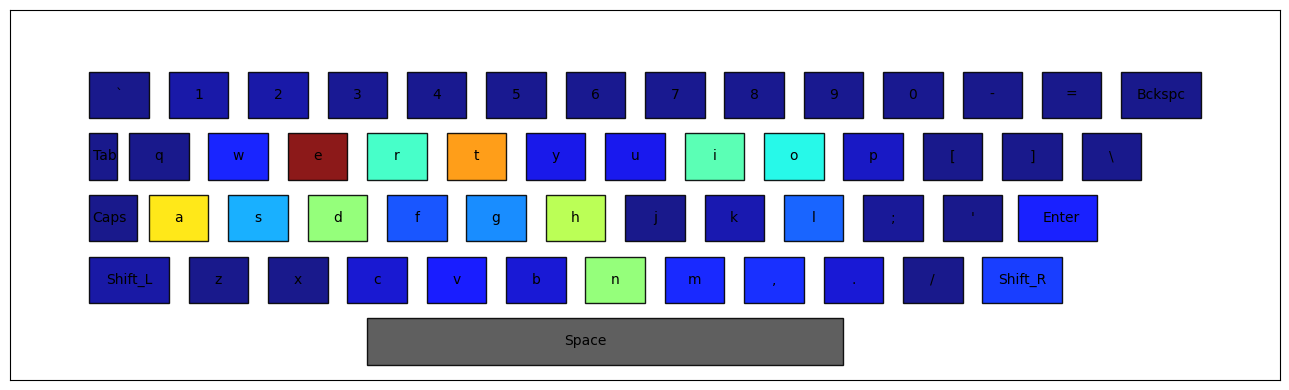

In [11]:
qwerty.travel_dist(sample_long_string)

In [ ]:
DVORAK_LAYOUT = {  # Dvorak Keyboard
    "row1": {
        "keys": "`1234567890[]",
        "positions": [
            (0, 0),
            (1, 0),
            (2, 0),
            (3, 0),
            (4, 0),
            (5, 0),
            (6, 0),
            (7, 0),
            (8, 0),
            (9, 0),
            (10, 0),
            (11, 0),
            (12, 0),
        ],
    },
    "row2": {
        "keys": "',.pyfgcrl/=\\",
        "positions": [
            (0.5, 1),
            (1.5, 1),
            (2.5, 1),
            (3.5, 1),
            (4.5, 1),
            (5.5, 1),
            (6.5, 1),
            (7.5, 1),
            (8.5, 1),
            (9.5, 1),
            (10.5, 1),
            (11.5, 1),
            (12.5, 1),
        ],
    },
    "row3": {
        "keys": "aoeuidhtns-",
        "positions": [
            (0.75, 2),
            (1.75, 2),
            (2.75, 2),
            (3.75, 2),
            (4.75, 2),
            (5.75, 2),
            (6.75, 2),
            (7.75, 2),
            (8.75, 2),
            (9.75, 2),
            (10.75, 2),
        ],
    },
    "row4": {
        "keys": ";qjkxbmwvz",
        "positions": [
            (1.25, 3),
            (2.25, 3),
            (3.25, 3),
            (4.25, 3),
            (5.25, 3),
            (6.25, 3),
            (7.25, 3),
            (8.25, 3),
            (9.25, 3),
            (10.25, 3),
        ],
    },
    "special_keys": {
        "Shift_L": (0, 3),
        "Shift_R": (11.25, 3),
        "Space": (3.5, 4),
        "Backspace": (13, 0),
        "Tab": (0, 1),
        "CapsLock": (0, 2),
        "Enter": (12, 2),
    },
}

dvorak = kbd_analysis(DVORAK_LAYOUT)
dvorak.travel_dist(sample_long_string)

In [ ]:
COLEMAK_LAYOUT = {  # Colemak Keyboard
    "row1": {
        "keys": "`1234567890-=",
        "positions": [
            (0, 0),
            (1, 0),
            (2, 0),
            (3, 0),
            (4, 0),
            (5, 0),
            (6, 0),
            (7, 0),
            (8, 0),
            (9, 0),
            (10, 0),
            (11, 0),
            (12, 0),
        ],
    },
    "row2": {
        "keys": "qwfpgjluy;[]\\",
        "positions": [
            (0.5, 1),
            (1.5, 1),
            (2.5, 1),
            (3.5, 1),
            (4.5, 1),
            (5.5, 1),
            (6.5, 1),
            (7.5, 1),
            (8.5, 1),
            (9.5, 1),
            (10.5, 1),
            (11.5, 1),
            (12.5, 1),
        ],
    },
    "row3": {
        "keys": "arstdhneio'",
        "positions": [
            (0.75, 2),
            (1.75, 2),
            (2.75, 2),
            (3.75, 2),
            (4.75, 2),
            (5.75, 2),
            (6.75, 2),
            (7.75, 2),
            (8.75, 2),
            (9.75, 2),
            (10.75, 2),
        ],
    },
    "row4": {
        "keys": "zxcvbkm,./",
        "positions": [
            (1.25, 3),
            (2.25, 3),
            (3.25, 3),
            (4.25, 3),
            (5.25, 3),
            (6.25, 3),
            (7.25, 3),
            (8.25, 3),
            (9.25, 3),
            (10.25, 3),
        ],
    },
    "special_keys": {
        "Shift_L": (0, 3),
        "Shift_R": (11.25, 3),
        "Space": (3.5, 4),
        "Backspace": (13, 0),
        "Tab": (0, 1),
        "CapsLock": (0, 2),
        "Enter": (12, 2),
    },
}

colemak = kbd_analysis(COLEMAK_LAYOUT)
colemak.travel_dist(sample_long_string)

In [ ]:
user_layout = input("Input a Layout")
sample_string = input("Enter a String")
user_keyboard = kbd_analysis(user_layout)
user_layout.travel_dist(sample_string)